In [1]:
#import esssential libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks for this analysis
tech_list = ['AAPL','MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'MSFT', 'AMZN']

start = '2019-11-01'
end = '2023-05-31'


for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL,  MSFT, AMZN]
company_name = ["APPLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [2]:
df

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2019-11-01,62.384998,63.982498,62.290001,63.955002,62.286358,151125200,APPLE
2019-11-04,64.332497,64.462502,63.845001,64.375000,62.695377,103272000,APPLE
2019-11-05,64.262497,64.547501,64.080002,64.282501,62.605293,79897600,APPLE
2019-11-06,64.192497,64.372498,63.842499,64.309998,62.632080,75864400,APPLE
2019-11-07,64.684998,65.087502,64.527496,64.857498,63.354939,94940400,APPLE
...,...,...,...,...,...,...,...
2023-05-23,114.269997,117.139999,113.779999,114.989998,114.989998,67576300,AMAZON
2023-05-24,115.349998,117.339996,115.019997,116.750000,116.750000,63487900,AMAZON
2023-05-25,116.629997,116.870003,114.309998,115.000000,115.000000,66496700,AMAZON


In [3]:
df.shape

(2697, 7)

In [4]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'company_name'], dtype='object')

In [5]:
df.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Adj Close       float64
Volume            int64
company_name     object
dtype: object

In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000,2.697000e+03
mean,170.039992,172.069970,168.000548,170.109938,168.398510,7.177859e+07
std,65.396954,65.906274,64.809296,65.399350,64.395724,4.897620e+07
min,57.020000,57.125000,53.152500,56.092499,54.923035,8.989200e+06
25%,123.870003,125.239998,122.209999,124.279999,123.105820,3.488840e+07
50%,157.850006,159.550003,155.800003,157.649994,156.844467,6.314160e+07
75%,211.589996,214.250000,209.110001,211.600006,206.078613,9.086590e+07
max,344.619995,349.670013,342.200012,343.109985,338.335907,4.265100e+08


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2697 entries, 2019-11-01 to 2023-05-30
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2697 non-null   float64
 1   High          2697 non-null   float64
 2   Low           2697 non-null   float64
 3   Close         2697 non-null   float64
 4   Adj Close     2697 non-null   float64
 5   Volume        2697 non-null   int64  
 6   company_name  2697 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 168.6+ KB


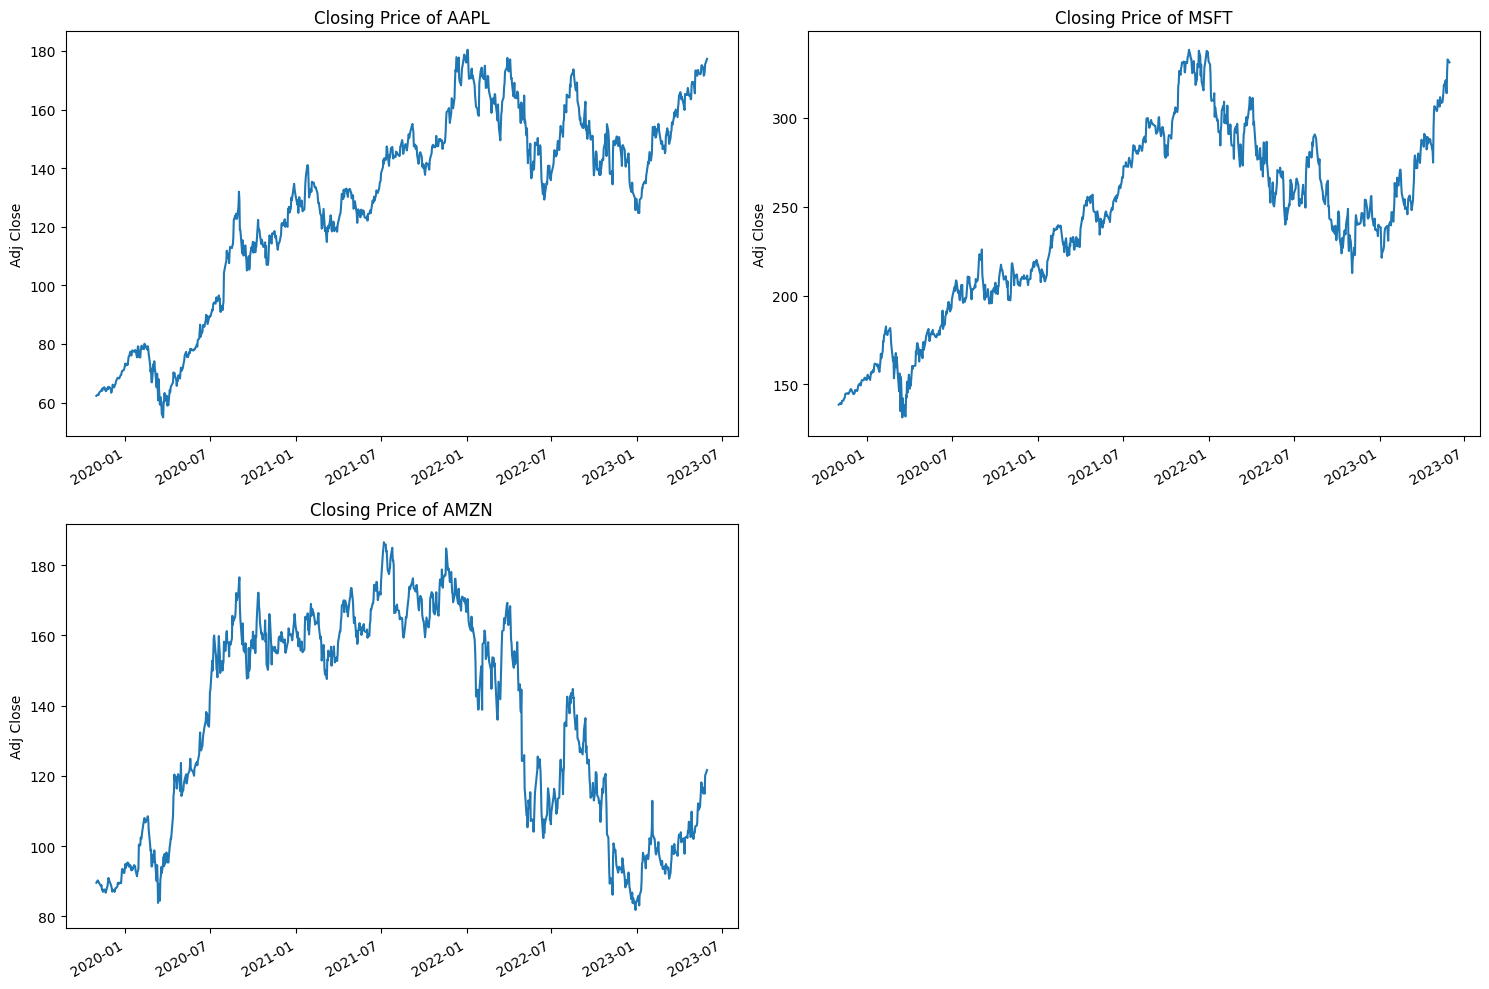

In [8]:
# historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

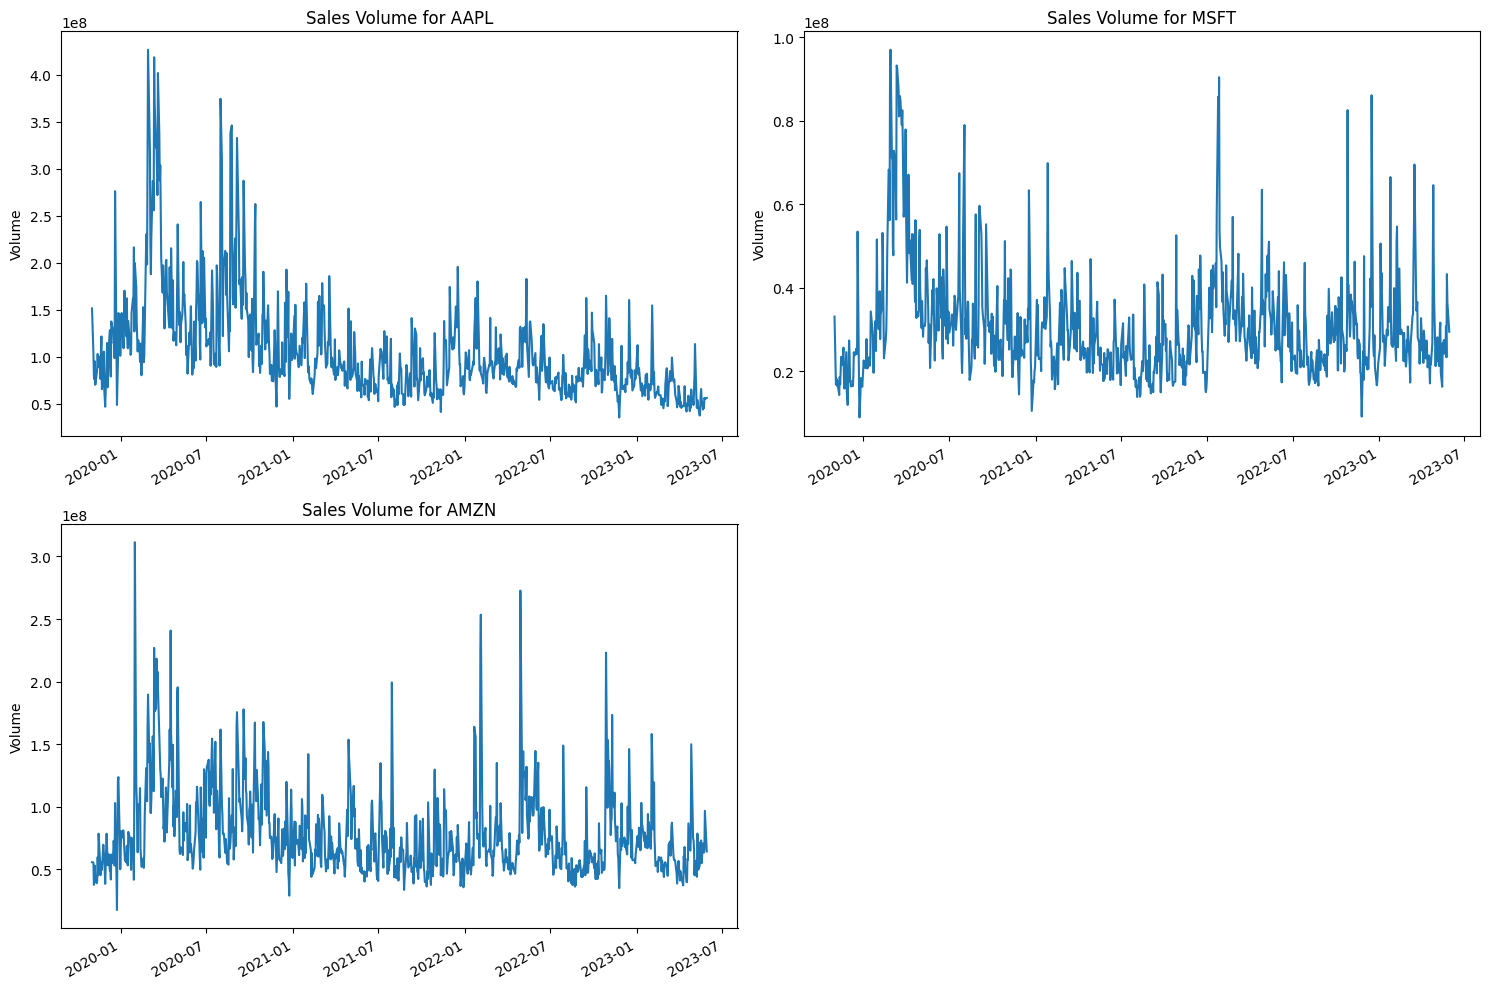

In [9]:
# total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

Text(0.5, 1.0, 'AMAZON')

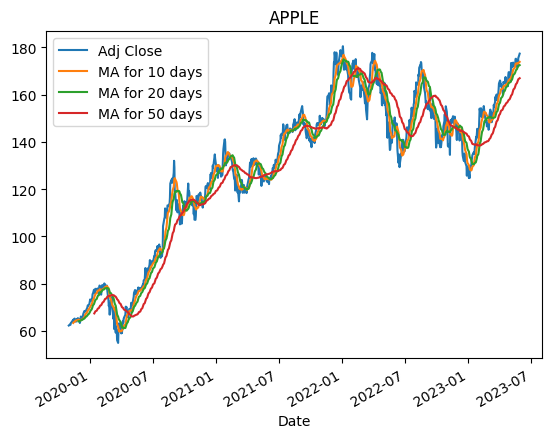

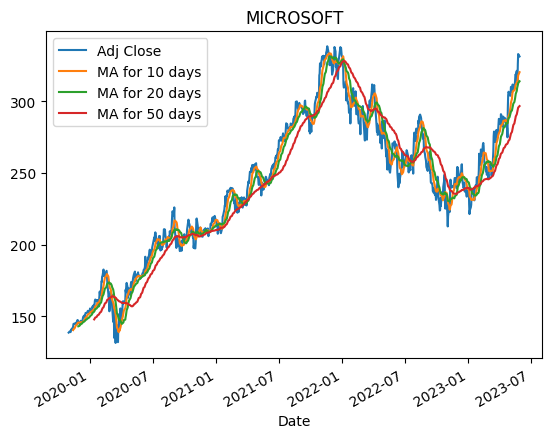

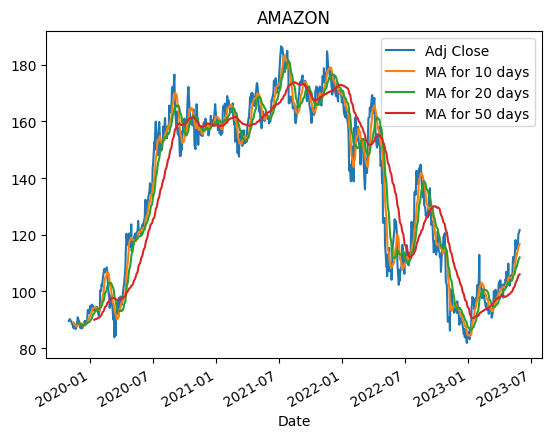

In [10]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()



AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot().set_title('APPLE')


MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot().set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot().set_title('AMAZON')



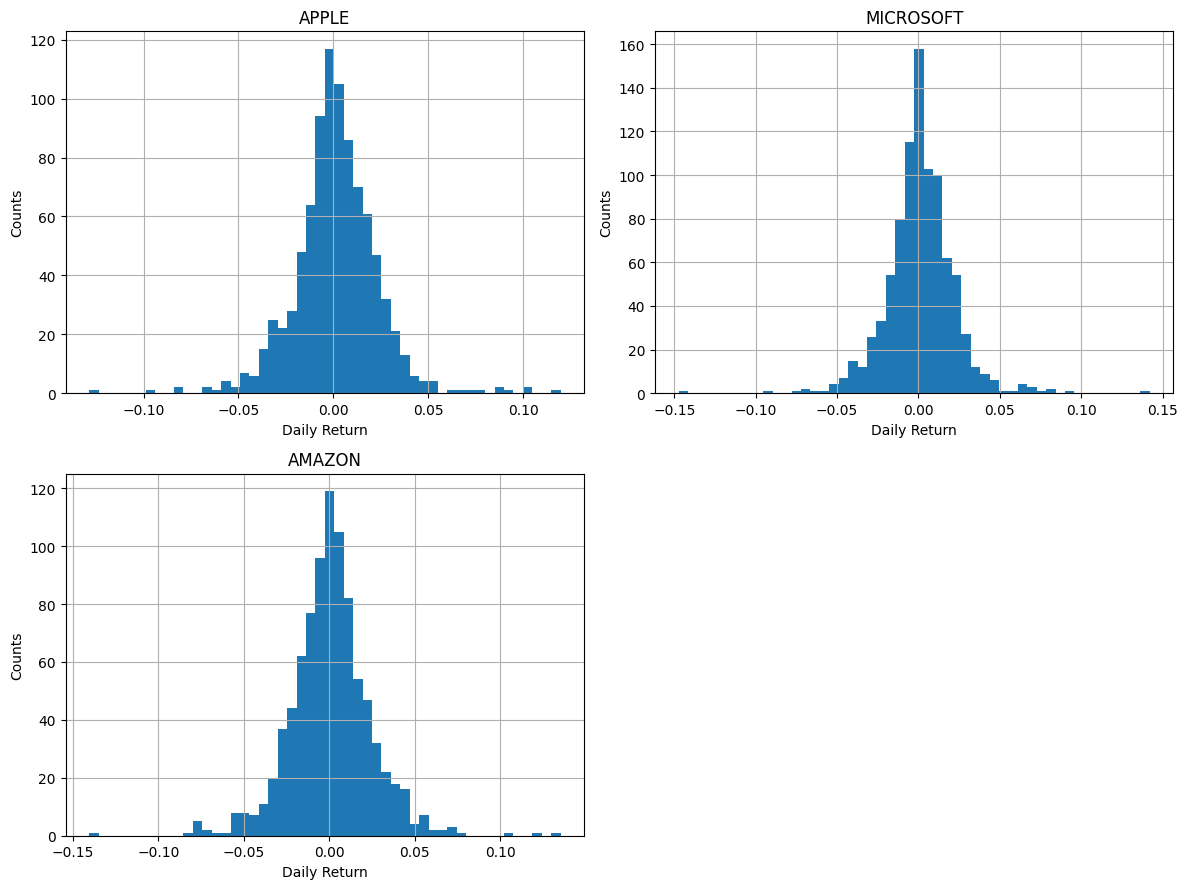

In [11]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

In [21]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']


tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  3 of 3 completed


,AAPL,AMZN,MSFT
Date,,,
2019-11-01,NaN,NaN,NaN
2019-11-04,0.006567,0.007380,0.005775
2019-11-05,-0.001437,-0.001635,-0.000623
2019-11-06,0.000428,-0.003297,-0.002769
2019-11-07,0.011541,-0.004215,0.001388


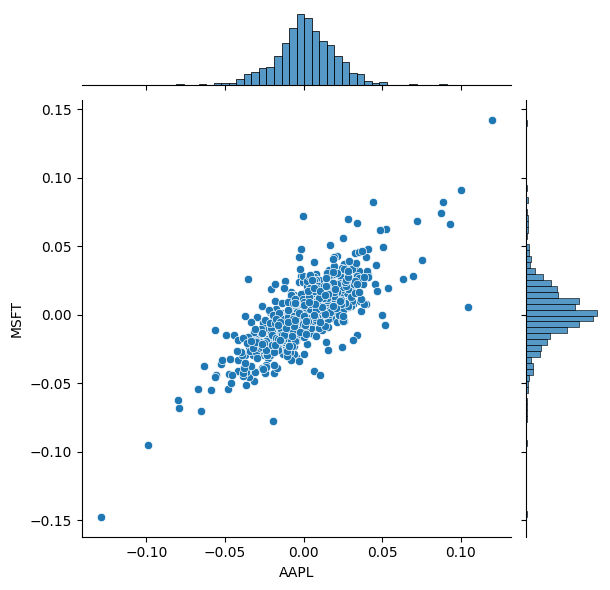

In [13]:
sns.jointplot(x='AAPL', y='MSFT', data=tech_rets, kind='scatter')

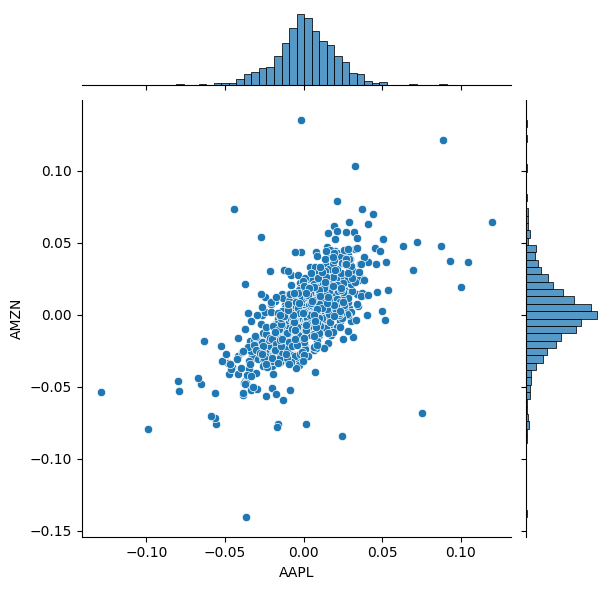

In [14]:
sns.jointplot(x='AAPL', y='AMZN', data=tech_rets, kind='scatter')

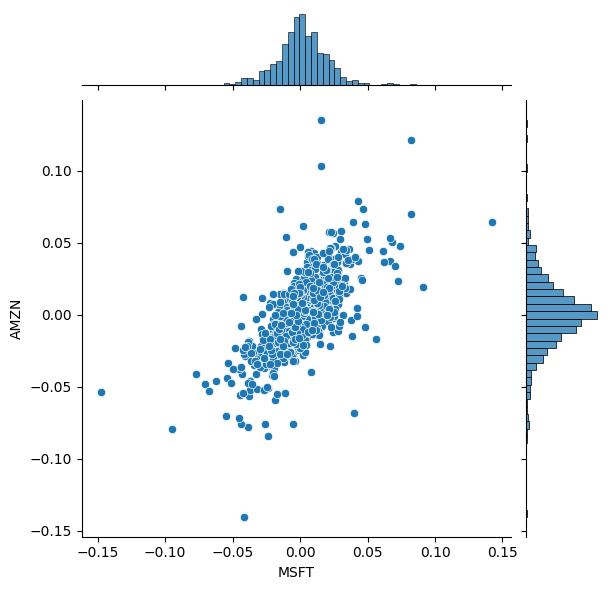

In [15]:
sns.jointplot(x='MSFT', y='AMZN', data=tech_rets, kind='scatter')

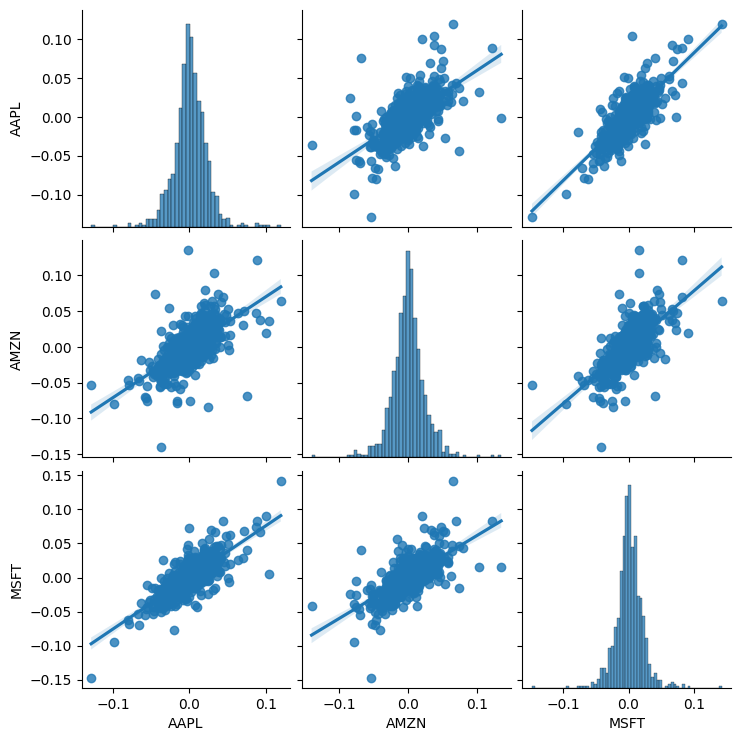

In [16]:
# call pairplot on our DataFrame for an automatic visual analysis
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

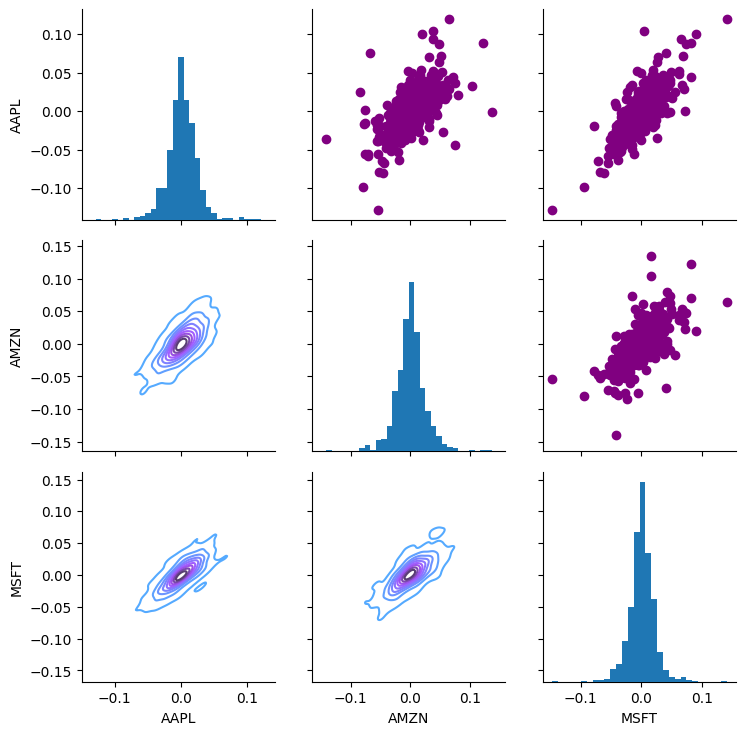

In [17]:
return_fig = sns.PairGrid(tech_rets.dropna())

return_fig.map_upper(plt.scatter, color='purple')
return_fig.map_lower(sns.kdeplot, cmap='cool_d')


return_fig.map_diag(plt.hist, bins=30)

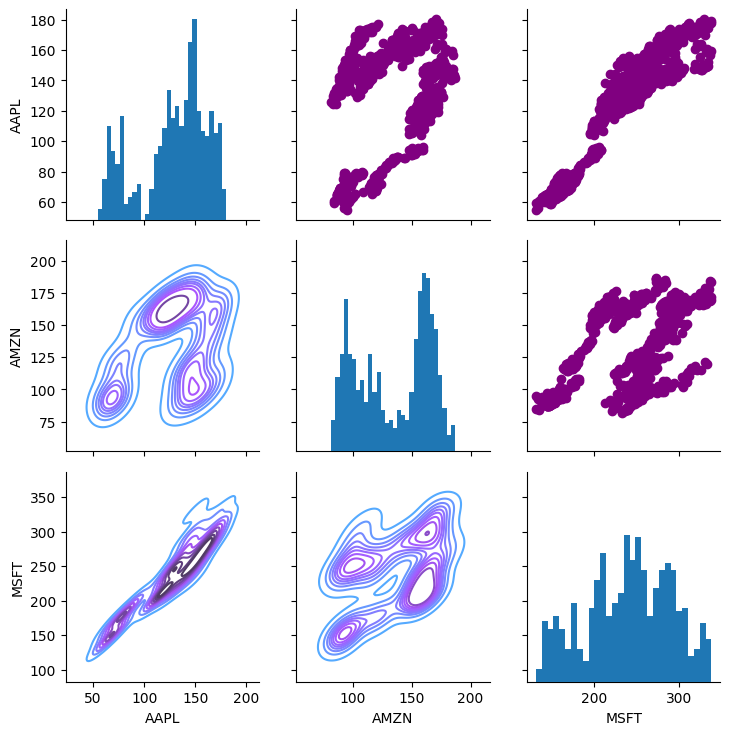

In [18]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

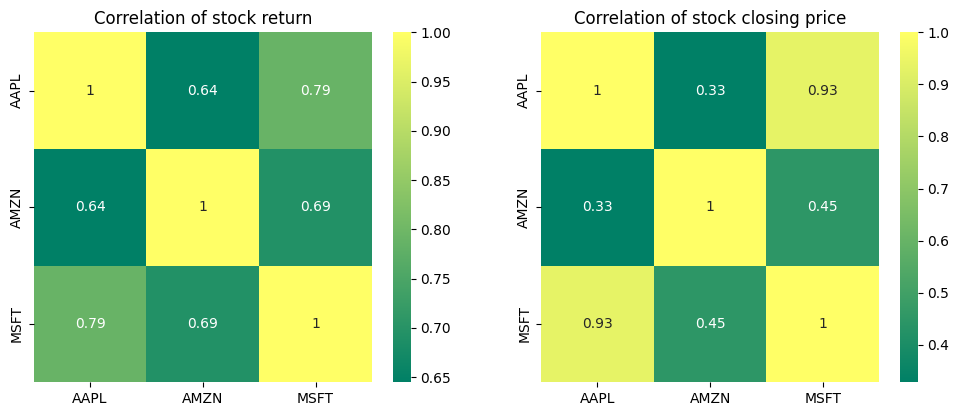

In [19]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

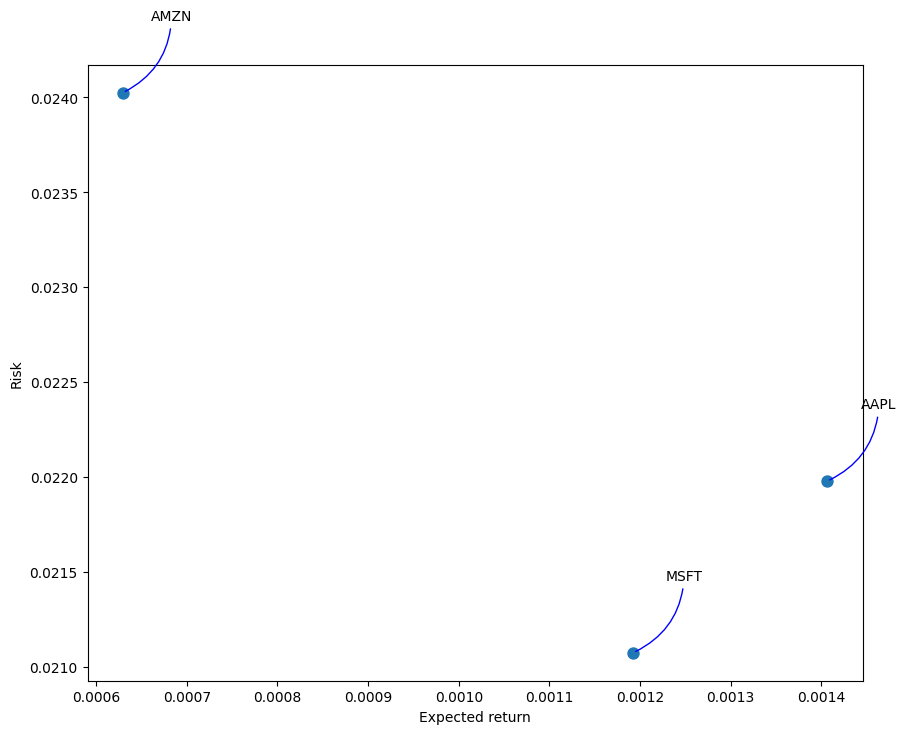

In [20]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))